In [4]:
using Pkg, Revise
Pkg.activate("..")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")

Random.seed!(113312);

  Activating project at `~/elementary-linear-algebra/GenLinAlgProblems`
[ Info: Precompiling GenLinAlgProblems [3c0f76d2-298f-40a4-82ea-fb4356fbbd2d] (cache misses: include_dependency fsize change (2))


# 1. NumPy, Latex Representations and Rounding

In [2]:
println("L string: Combine text and latex expressions")
A = [1 -2; 3 122]
L"\;\;\text{We define the matrix } A = %$(latexify(A, adjustment=:r, transpose=true, arraystyle=:round))"

L string: Combine text and latex expressions


L"$\;\;\text{We define the matrix } A = \begin{equation}
\left(
\begin{array}{rr}
1 & 3 \\
-2 & 122 \\
\end{array}
\right)
\end{equation}
$"

In [3]:
println("HTML: Wrap the text in a div")

A=[1 -2; 3 122]
latex_string = L"\;\;\text{We define the matrix } \quad A = %$(latexify(A))"
html_string  = """<div style="text-align: left;padding-left:1cm;">$latex_string</div>"""

# Display the HTML string
display("text/html", html_string)

HTML: Wrap the text in a div


$\;\;\text{We define the matrix } \quad A = \begin{equation}
\left[
\begin{array}{cc}
1 & -2 \\
3 & 122 \\
\end{array}
\right]
\end{equation}
$

In [4]:
A=[1 -2; 3 122]
L1 = L"\;\;\text{We define the matrix }\;\; A = %$(latexify(A))"
L2 = L"B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}"
sep = L"\quad \text{and} \;\;"
display(L"L string: Concatenation test: %$(L1), %$(sep)  %$(L2)")

L"L string: Concatenation test: $\;\;\text{We define the matrix }\;\; A = \begin{equation}
\left[
\begin{array}{cc}
1 & -2 \\
3 & 122 \\
\end{array}
\right]
\end{equation}
$, $\quad \text{and} \;\;$  $B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}$"

In [5]:
# Print out a definition of an integer array for use with numpy
A = [ 1 2 1; -1 1 2]
print_np_array_def(A)

"A = np.array([\n[1, 2, 1],\n[-1, 1, 2]\n])"

In [6]:
matrices=[[ [1 2; 2 1], :none], [:none]]
latexify( apply_function( x -> x^2, matrices) )

L"$\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1 & 4 \\
4 & 1 \\
\end{array}
\right] \\
none \\
\end{array}
\right] \\
\left[
\begin{array}{c}
none \\
\end{array}
\right] \\
\end{array}
\right]$"

In [7]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]], [["alpha" "b"], [1.1 π] ] ]
println( apply_function( x->to_latex(x), matrices ))

Vector[[["1" "2"; "2" "1"], ["1" "2"; "-\\frac{3}{5}" "-1"]], Matrix[LaTeXString[L"$\alpha$" L"$b$"], ["1.1" "3.141592653589793"]]]


In [8]:
to_latex( -1//2), to_latex(2+1//2im)

("-\\frac{1}{2}", "2 - \\frac{1}{2}\\mathit{i}")

In [9]:
factor_out_denominator( [1//2 1//3; 2//1 1//(-3) ])

(6, [3 2; 12 -2])

In [10]:
round_value( 2.3, 0), round_value(1//3, 3), round_value( Complex(1//3, -1//5),0), round_value( Complex(1//3, -1//5), 1), round_value( Complex(0, -1//5), 1)

(2, 0.333, 0 + 0im, 0.3 - 0.2im, 0.0 - 0.2im)

In [11]:
res = round_value( Complex(0,-1//5), 1)
to_latex(res)

"-0.2\\mathit{i}"

In [12]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]] ]
stack = apply_function( x->Complex(x+1//3, 1//5), matrices)
latexify( round_matrices(stack,1) )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
2.3+0.2\mathit{i} & 1.3+0.2\mathit{i} \\
\end{array}
\right] \\
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
-0.3+0.2\mathit{i} & -0.7+0.2\mathit{i} \\
\end{array}
\right] \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [13]:
m=latexify(stack[1][1])
println(m)
m

\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}



L"\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}
"

In [14]:
display(l_show(m))
l_show(group(matrices[1]...,stack[1][1], stack[1][2], groupstyle=:array, separator=L"\quad "))

L"$\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}$
"

L"$ \left(\begin{array}{rr}
1 & 2 \\
2 & 1 \\
\end{array}\right) \quad  \frac{1}{5} \left(\begin{array}{rr}
5 & 10 \\
-3 & -5 \\
\end{array}\right) \quad  \frac{1}{15} \left(\begin{array}{rr}
20 + 3\mathit{i} & 35 + 3\mathit{i} \\
35 + 3\mathit{i} & 20 + 3\mathit{i} \\
\end{array}\right) \quad  \frac{1}{15} \left(\begin{array}{rr}
20 + 3\mathit{i} & 35 + 3\mathit{i} \\
-4 + 3\mathit{i} & -10 + 3\mathit{i} \\
\end{array}\right) $
"

# 2. GE, GJ Type Problems

## 2.1. Generate Different Types of Matrices

In [15]:
# unit lower triangular matrix
Random.seed!(3)
l_show( L"\;\;\text{unit lower triangular matrix: \quad }", unit_lower(3,4; maxint=4) )

L"$\;\;\text{unit lower triangular matrix: \quad } \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
4 & 4 & 1 & 0 \\
\end{array}\right)$
"

In [16]:
# lower triangilar matrix
Random.seed!(23)
l_show( L"\text{lower triangular matrix} \qquad ", lower(3))

L"$\text{lower triangular matrix} \qquad  \left(\begin{array}{rrr}
-3 & 0 & 0 \\
1 & 1 & 0 \\
1 & 2 & 3 \\
\end{array}\right)$
"

In [17]:
# reduced row echelon form matrix of given rank, with and without zero values to the right of pivots
Random.seed!(13221)
mat,pivot_cols = rref_matrix(4,10,3; maxint=5, pivot_in_first_col=false, has_zeros=false)
println("pivot cols: $pivot_cols")
l_show( L"\text{RREF} \qquad ", mat )

pivot cols: [2, 6, 9]


L"$\text{RREF} \qquad  \left(\begin{array}{rrrrrrrrrr}
0 & 1 & -5 & -2 & 5 & 0 & -4 & -5 & 0 & -2 \\
0 & 0 & 0 & 0 & 0 & 1 & -3 & -5 & 0 & 4 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 3 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}\right)$
"

In [18]:
Random.seed!(1212)
l_show( L"\text{Symmetric matrix: }\qquad ", symmetric_matrix(4;maxint=9, with_zeros=true))

L"$\text{Symmetric matrix: }\qquad  \left(\begin{array}{rrrr}
7 & -1 & -2 & 7 \\
-1 & -4 & -4 & -4 \\
-2 & -4 & -7 & 0 \\
7 & -4 & 0 & -5 \\
\end{array}\right)$
"

In [19]:
Random.seed!(1212)
L"\text{Skew symmetric matrix: } \qquad %$(latexify(skew_symmetric_matrix(4;maxint=9, with_zeros=true), adjustment=:r))"

L"$\text{Skew symmetric matrix: } \qquad \begin{equation}
\left[
\begin{array}{rrrr}
0 & 1 & 2 & -7 \\
-1 & 0 & 4 & 4 \\
-2 & -4 & 0 & 0 \\
7 & -4 & 0 & 0 \\
\end{array}
\right]
\end{equation}
$"

In [20]:
Random.seed!(44372)
L"\text{Elimination Matrix:} \qquad %$(latexify(i_with_onecol(6, 2; maxint=9, with_zeros=true ), adjustment=:r))"

L"$\text{Elimination Matrix:} \qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & -9 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 0 & 1 & 0 \\
0 & -3 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

In [21]:
Random.seed!(44372)
L"\text{Elimination Matrix, no zeros:}\qquad %$(latexify(i_with_onecol(6, 3; maxint=9, with_zeros=false,upper=false ), adjustment=:r))"

L"$\text{Elimination Matrix, no zeros:}\qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & -9 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 & 1 & 0 \\
0 & 0 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

In [22]:
Random.seed!(44372)
L"\text{Elimination Matrix, upper:}\qquad %$(latexify(i_with_onecol(6, 4; maxint=9, with_zeros=false,lower=false ), adjustment=:r))"

L"$\text{Elimination Matrix, upper:}\qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & -9 & 0 & 0 \\
0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

## 2.2 Generating GE and GJ Type Problems

In [23]:
Random.seed!(416)
pivot_cols,A = gen_gj_matrix(5,4,2;maxint=2,pivot_in_first_col=true, has_zeros=true)
lp=L"\text{pivot columns: } %$(latexify( pivot_cols)')"
la=L"\quad A=%$(latexify(A, adjustment=:r))"
L"%$(lp), %$(la)" 

L"$\text{pivot columns: } \begin{equation}
\left[
\begin{array}{c}
1 \\
3 \\
\end{array}
\right]
\end{equation}
$, $\quad A=\begin{equation}
\left[
\begin{array}{rrrr}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right]
\end{equation}
$"

In [24]:
X,B=gen_rhs(A,pivot_cols; maxint=2,num_rhs=2,has_zeros=false)
latexify( [A', X', latex(" = "), B']')

L"\begin{equation}
\left[
\begin{array}{cccc}
\left[
\begin{array}{cccc}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right] & \left[
\begin{array}{cc}
2 & -2 \\
0 & 0 \\
-1 & 2 \\
0 & 0 \\
\end{array}
\right] &  =  & \left[
\begin{array}{cc}
0 & 4 \\
2 & -8 \\
-4 & 0 \\
-2 & 4 \\
-2 & 12 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [25]:
Random.seed!(41283)
A,X,B=gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
latexify( [ [A B]', X']')

L"$\left[
\begin{array}{cc}
\left[
\begin{array}{cccccccc}
0 & 1 & -2 & 2 & 3 & 1 & 3 & 0 \\
0 & -2 & 3 & -2 & -5 & -1 & -5 & 1 \\
0 & 2 & -4 & 4 & 6 & 2 & 6 & 0 \\
\end{array}
\right] & \left[
\begin{array}{cc}
0 & 0 \\
1 & -2 \\
-1 & -1 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [26]:
Random.seed!(41299)
pivot_cols,L,U,A=gen_lu_pb(4,6,3)
latexify( [pivot_cols, A' ]')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccc}
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{cccccc}
-1 & -1 & 2 & 2 & 0 & -2 \\
1 & 4 & -8 & -8 & -12 & 5 \\
-3 & -3 & 6 & 5 & 4 & -8 \\
2 & 8 & -16 & -15 & -28 & 12 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [27]:
Random.seed!(41299)
pivot_cols,P,L,U,A=gen_plu_pb(5,7,3)
display(L"\text{pivot cols: } %$(pivot_cols)")
latexify( [ A', latex(" = "), P', L', U' ]')

L"$\text{pivot cols: } [1, 2, 4]$"

"\\begin{equation}\n\\left[\n\\begin{array}{ccccc}\n\\left[\n\\begin{array}{ccccccc}\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 1 & 1 & 3 & 5 & -8 & -4 \\\\\n0 & -2 & -2 & 0 & 8 & 4 & -4 \\\\\n2 & 3 & -3 & -9 & -7 & 4 & 12 \\\\\n\\end{array}\n\\right] &  =  & \\left[\n\\begi" ⋯ 270 bytes ⋯ "& 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccccc}\n2 & 3 & -3 & -9 & -7 & 4 & 12 \\\\\n0 & 1 & 1 & 3 & 5 & -8 & -4 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

## 2.3 GE,GJ Solvers

#### <strong>GJ Problem</strong>

In [28]:
Random.seed!(41283)
A,X,B = gen_gj_pb(2,3,2; maxint=2, pivot_in_first_col=false, num_rhs=1,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka X")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )

Particular Solution, aka X


3×1 Matrix{Int64}:
 0
 2
 1

No GUI available, some actions may fail

** (inkscape:8034): WARNING **: 14:02:51.648: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


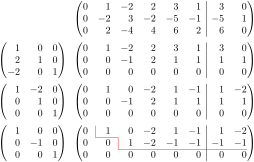

In [29]:
Random.seed!(41283)
A,X,B = gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )

pivot_locs    = [(i-1,Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ]

h,m=nM.ge( to_latex(matrices), Nrhs=size(B,2),
     ref_path_list = ref_path_list, tmp_dir="../../tmp")
h

In [30]:
_,_, desc = reduce_to_ref( [A B], gj=true )
desc

9-element Vector{Any}:
 GenLinAlgProblems.FoundPivot(0, 1, 1, 2, 1, [2])
 GenLinAlgProblems.RequireElimination(0, true, true, 1, 2, 1, [2])
 GenLinAlgProblems.DoElimination(1, 1, 2, true)
 GenLinAlgProblems.FoundPivot(1, 2, 2, 3, 2, [2, 3])
 GenLinAlgProblems.RequireElimination(1, true, true, 2, 3, 2, [2, 3])
 GenLinAlgProblems.DoElimination(2, 2, 3, true)
 GenLinAlgProblems.RequireScaling(2, [2, 3])
 GenLinAlgProblems.DoScaling(3)
 GenLinAlgProblems.Finished(3, [2, 3])

##### GJ problem details

In [31]:
println("Pivot Cols: $pivot_cols" )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka X")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )

Pivot Cols: [2, 3]
Particular Solution, aka X


6×2 Matrix{Int64}:
  0   0
  1  -2
 -1  -1
  0   0
  0   0
  0   0

In [32]:
println("Homogeneous Solution")
X_h = homogeneous_solutions( RB[:,1:size(A,2)], pivot_cols)

Homogeneous Solution
[1 0 0 0; 0 2 -1 1; 0 2 1 1; 0 1 0 0; 0 0 1 0; 0 0 0 1]


6×4 Matrix{Rational{Int64}}:
 1  0   0  0
 0  2  -1  1
 0  2   1  1
 0  1   0  0
 0  0   1  0
 0  0   0  1

In [33]:
println("Particular Solution")
X

Particular Solution


6×2 Matrix{Int64}:
  0   0
  1  -2
 -1  -1
  0   0
  0   0
  0   0

In [34]:
to_latex(matrices)

4-element Vector{Vector}:
 Any[:none, ["0" "1" … "3" "0"; "0" "-2" … "-5" "1"; "0" "2" … "6" "0"]]
 [["1" "0" "0"; "2" "1" "0"; "-2" "0" "1"], ["0" "1" … "3" "0"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "-2" "0"; "0" "1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "0" "0"; "0" "-1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "-1" "-1"; "0" "0" … "0" "0"]]

#### <strong>Inverse Problem</strong>

No GUI available, some actions may fail

** (inkscape:8085): WARNING **: 14:02:59.473: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


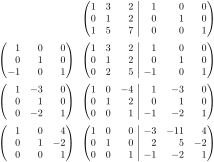

In [35]:
A, A_inv                = gen_inv_pb(3, maxint=3)
matrices, pivot_cols, _ = reduce_to_ref( Rational{Int64}.([A 1I]), gj=true)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../../tmp" )
h

#### **LU problem**

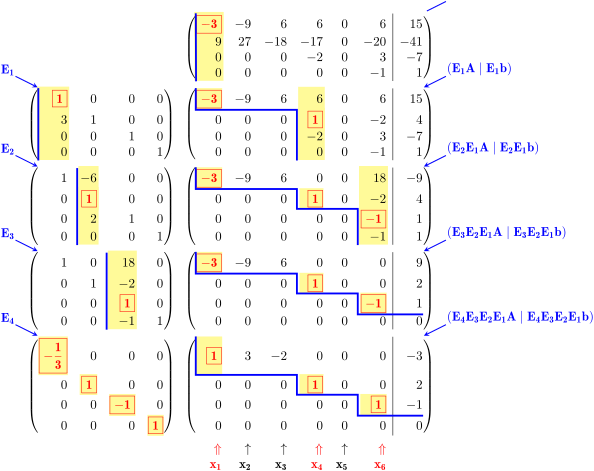

In [36]:
Random.seed!(5003)
m,n,r=4,6,3
pivot_cols, L,U, A = gen_lu_pb(m,n,r, maxint=3)
x,b                       = gen_rhs(A, pivot_cols)

matrices,pivot_cols,desc  = reduce_to_ref( [A b], n=n, gj=true )

pivot_list, bg_for_entries, ref_path_list, basic_var = decorate_ge(desc,pivot_cols,size(A); pivot_color="yellow!40");
#println.(bg_for_entries)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=1,
           fig_scale        = 1.3,
           pivot_list       = pivot_list, pivot_text_color="red", variable_colors=["red", "black"],
           bg_for_entries   = bg_for_entries,
           ref_path_list    = ref_path_list,
           variable_summary = basic_var,
           array_names=["E", ["A", "b"]],
           tmp_dir="../../tmp", keep_file="../../tmp/bah")
h

#### **$LDL^t$ problem**

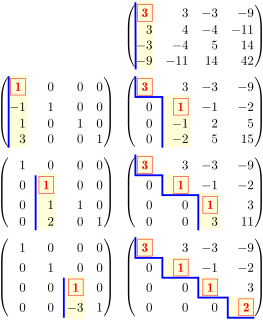

In [37]:
Random.seed!(4105)

L,D,A = gen_ldlt_pb(4)

matrices,_,desc  = reduce_to_ref( A )
pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,_ = nM.ge(to_latex(matrices), formater=x->x,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
            fig_scale      = 1.3,
            tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

In [38]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D = Diagonal(matrices[end][end])
LDLt = L*D*L'
l_show( L"L D L^t = A : \qquad", Int.(L),Int.(D), Int.(L)', L" = ", Int.(LDLt), inline=true )

L"$L D L^t = A : \qquad \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 \\
-1 & -1 & 1 & 0 \\
-3 & -2 & 3 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
3 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 2 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 1 & -1 & -3 \\
0 & 1 & -1 & -2 \\
0 & 0 & 1 & 3 \\
0 & 0 & 0 & 1 \\
\end{array}\right)  =  \left(\begin{array}{rrrr}
3 & 3 & -3 & -9 \\
3 & 4 & -4 & -11 \\
-3 & -4 & 5 & 14 \\
-9 & -11 & 14 & 42 \\
\end{array}\right)$
"

#### **Cholesky Decomposition**

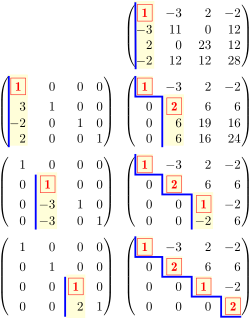

In [39]:
Random.seed!(41325)

L,D,A            = gen_ldlt_pb(4)
matrices,_,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,m = nM.ge(to_latex(matrices), formater=x->x,
            fig_scale      = 1.3,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
            tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

In [40]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D   = Diagonal(matrices[end][end])
G   = sqrt.(Sym.(D))*L'
GtG = G'G

l_show( G, G', L"= ", GtG)

L"$\left(\begin{array}{rrrr}
1 & -3 & 2 & -2 \\
0 & \sqrt{2} & 3 \cdot \sqrt{2} & 3 \cdot \sqrt{2} \\
0 & 0 & 1 & -2 \\
0 & 0 & 0 & \sqrt{2} \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-3 & \sqrt{2} & 0 & 0 \\
2 & 3 \cdot \sqrt{2} & 1 & 0 \\
-2 & 3 \cdot \sqrt{2} & -2 & \sqrt{2} \\
\end{array}\right) =  \left(\begin{array}{rrrr}
1 & -3 & 2 & -2 \\
-3 & 11 & 0 & 12 \\
2 & 0 & 23 & 12 \\
-2 & 12 & 12 & 28 \\
\end{array}\right)$
"

#### **PLU Problem**

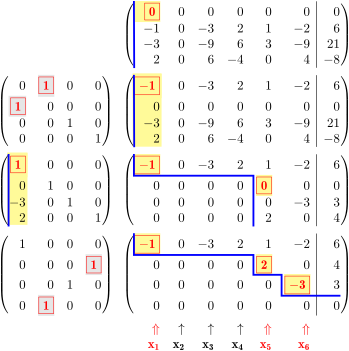

In [41]:
Random.seed!(4208)

pivot_cols,P,L,U,A        = gen_plu_pb(4,6,3)
x,b                       = gen_rhs(A, pivot_cols)
#print(L_show(b, arraystyle=:curlyarray))

pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../../tmp")
ref!(pb)
show_layout!(pb, fig_scale=1.3)

#### New Interface

In [5]:
Random.seed!(323);
A,X,B = gen_gj_pb(2,3,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
pb = ShowGe{Rational{Int}}( A,  B, tmp_dir="../../tmp")

show_system( pb, b_col=2 )

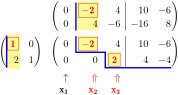

In [6]:
ref!(pb)
show_layout!(pb)

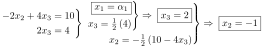

In [7]:
#create_cascade!(pb, b_col=2)
show_backsubstitution!(pb, b_col=1)

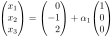

In [8]:
show_solution!(pb, b_col=1)

In [9]:
Xp, Xh = solutions(pb)
l_show( L"B =", pb.B, L"\quad x_p =", Xp, L"\quad x_h = ", Xh)

L"$B = \left(\begin{array}{rr}
10 & -6 \\
-16 & 8 \\
\end{array}\right) \quad x_p = \left(\begin{array}{rr}
0 & 0 \\
-1 & -1 \\
2 & -2 \\
\end{array}\right) \quad x_h =  \left(\begin{array}{r}
1 \\
0 \\
0 \\
\end{array}\right)$
"

In [16]:
#form_linear_combination(symbol_vector(L"\alpha", pb.free_cols), Xh)

# 3. Normal Equation, QR Type Problems

## 3.1 Orthogonal Matrices

In [112]:
Random.seed!(27)

c,mat = W_2_matrix()
latexify( [mat', (mat'mat//(c*c))' ]')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{cc}
5 & -12 \\
12 & 5 \\
\end{array}
\right] & \left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [113]:
Random.seed!(27)

m=Q_2_matrix()
latexify( [m', (m'm)']')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{cc}
\frac{5}{13} & \frac{-12}{13} \\
\frac{12}{13} & \frac{5}{13} \\
\end{array}
\right] & \left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [45]:
Random.seed!(28)
c,m=W_3_matrix()
latexify(m)

L"\begin{equation}
\left[
\begin{array}{ccc}
-2 & 0 & 0 \\
0 & 15 & -112 \\
0 & 112 & 15 \\
\end{array}
\right]
\end{equation}
"

In [115]:
Random.seed!(28)
m = Q_3_matrix()
latexify( [m', (m'm)']' )

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccc}
0 & \frac{-112}{113} & \frac{15}{113} \\
0 & \frac{15}{113} & \frac{112}{113} \\
1 & 0 & 0 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [116]:
Random.seed!(28)
m = Q_4_blocks()
latexify( [m', (m'm)']' )

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{cccc}
\frac{24}{25} & 0 & 0 & \frac{7}{25} \\
\frac{7}{25} & 0 & 0 & \frac{-24}{25} \\
0 & \frac{-112}{113} & \frac{15}{113} & 0 \\
0 & \frac{15}{113} & \frac{112}{113} & 0 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [117]:
Random.seed!(288)
c,m,den = W_4_matrix()
latexify( [m', (m'm//(c*c))']' )

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{cccc}
13 & 6 & 0 & 18 \\
-18 & 0 & 6 & 13 \\
0 & -18 & -13 & 6 \\
6 & -13 & 18 & 0 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [118]:
Random.seed!(388)
m=Q_4_matrix()

latexify([m',(m'm)']')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{cccc}
\frac{2}{27} & \frac{10}{27} & 0 & \frac{25}{27} \\
\frac{-25}{27} & 0 & \frac{-10}{27} & \frac{2}{27} \\
0 & \frac{-25}{27} & \frac{2}{27} & \frac{10}{27} \\
\frac{-10}{27} & \frac{2}{27} & \frac{25}{27} & 0 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [119]:
Random.seed!(388)
m4=Q_matrix(4)
m5=Q_matrix(5)

latexify([[m4',(m4'm4)']', [m5', (m5'm5)']'])

"\\begin{equation}\n\\left[\n\\begin{array}{c}\n\\left[\n\\begin{array}{cc}\n\\left[\n\\begin{array}{cccc}\n\\frac{115}{129} & \\frac{-6}{43} & \\frac{44}{129} & \\frac{34}{129} \\\\\n\\frac{34}{129} & \\frac{33}{43} & \\frac{-70}{129} & \\frac{28}{129} \\\\\n\\frac{-44}{129} & \\frac{18}{43} & \\frac{" ⋯ 715 bytes ⋯ "rac{-102}{203} & \\frac{24}{29} \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccc}\n1 & 0 & 0 & 0 & 0 \\\\\n0 & 1 & 0 & 0 & 0 \\\\\n0 & 0 & 1 & 0 & 0 \\\\\n0 & 0 & 0 & 1 & 0 \\\\\n0 & 0 & 0 & 0 & 1 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [120]:
Random.seed!(388)
m=sparse_Q_matrix((1,1,3))
latexify( [m', (m'm)']' )

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccccc}
\frac{3}{23} & 0 & \frac{14}{23} & 0 & \frac{-18}{23} \\
\frac{-6}{23} & 0 & \frac{18}{23} & 0 & \frac{13}{23} \\
0 & 0 & 0 & -1 & 0 \\
0 & -1 & 0 & 0 & 0 \\
\frac{22}{23} & 0 & \frac{3}{23} & 0 & \frac{6}{23} \\
\end{array}
\right] & \left[
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [121]:
Random.seed!(388)
c,m=sparse_W_matrix((1,1,3))
latexify( [m', (m'm//(c*c))']'  )

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccccc}
3 & 0 & 14 & 0 & -18 \\
-6 & 0 & 18 & 0 & 13 \\
0 & 0 & 0 & -23 & 0 \\
0 & -23 & 0 & 0 & 0 \\
22 & 0 & 3 & 0 & 6 \\
\end{array}
\right] & \left[
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [125]:
Random.seed!(388)
m = W_matrix(5)
latexify([m', (m'm)']')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccccc}
16 & -11 & 38 & -18 & -8 \\
9 & 32 & -8 & -16 & -28 \\
8 & 18 & 19 & 38 & -4 \\
-28 & -16 & 4 & 8 & -33 \\
-32 & 22 & 18 & -11 & 16 \\
\end{array}
\right] & \left[
\begin{array}{ccccc}
2209 & 0 & 0 & 0 & 0 \\
0 & 2209 & 0 & 0 & 0 \\
0 & 0 & 2209 & 0 & 0 \\
0 & 0 & 0 & 2209 & 0 \\
0 & 0 & 0 & 0 & 2209 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

## 3.2 Normal Equation and QR Problems

### 3.2.1 Projection Matrix

In [126]:
A =  gen_full_col_rank_matrix( (1,1,2),3; maxint=2 )
P = ca_projection_matrix( A )
dA,Aint = factor_out_denominator( A )
dP,Pint = factor_out_denominator( P )
latexify([latex("P = \\frac{1}{$(dP)}"), Pint', latex("A = \\frac{1}{$(dA)}"), Aint']')

L"\begin{equation}
\left[
\begin{array}{cccc}
P = \frac{1}{75} & \left[
\begin{array}{cccc}
59 & 20 & -12 & 20 \\
20 & 50 & 15 & -25 \\
-12 & 15 & 66 & 15 \\
20 & -25 & 15 & 50 \\
\end{array}
\right] & A = \frac{1}{5} & \left[
\begin{array}{ccc}
-1 & 0 & 4 \\
-5 & 10 & 5 \\
-7 & 0 & 3 \\
0 & -10 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [127]:
latexify([gen_qr_problem(4;maxint=2)', gen_qr_problem_3(maxint=2)', gen_qr_problem_4(maxint=2)']')

L"$\left[
\begin{array}{ccc}
\left[
\begin{array}{cccc}
-1 & 2 & 0 & -2 \\
-1 & 2 & 2 & 0 \\
1 & 0 & -2 & 2 \\
1 & 0 & -4 & -4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
-35 & -35 & -23 \\
12 & 12 & 47 \\
0 & -1 & 1 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
-6 & -24 & -6 & -17 \\
0 & 1 & 7 & 25 \\
1 & 1 & -20 & -12 \\
18 & 12 & -41 & -5 \\
\end{array}
\right] \\
\end{array}
\right]$"

### 3.2.2 QR Problems

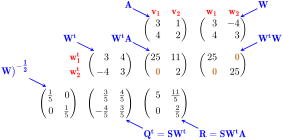

In [128]:
A=[3 1; 4 2]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

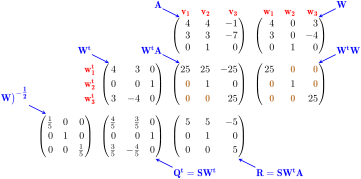

In [129]:
A   = gen_qr_problem_3(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

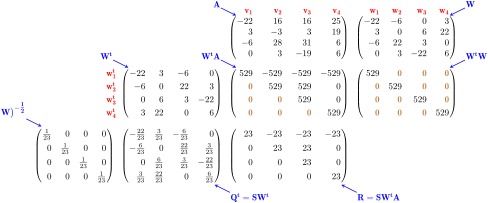

In [130]:
A   = gen_qr_problem_4(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp", fig_scale=0.9)
h

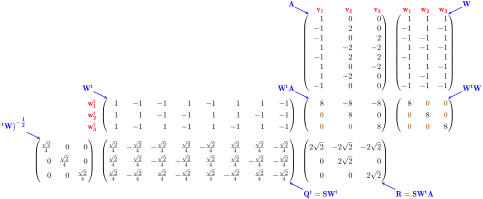

In [131]:
A   = gen_qr_problem(8, maxint=1)
W   = gram_schmidt_w(A[:,1:3])
h,m = nM.gram_schmidt_qr(A[:,1:3], W, fig_scale=0.8, tmp_dir="../../tmp")
h

# 4. Eigenproblems

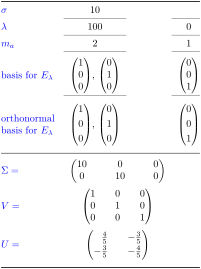

In [132]:
A =[8 -6 0; -6 -8 0]
nM.show_svd_table(A, Ascale=1, mmS=7, mmLambda=10, tmp_dir="../../tmp")

L"\begin{equation}
\left[
\begin{array}{ccccc}
\left[
\begin{array}{ccc}
2 & 0 & -1 \\
1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right] & =  & \left[
\begin{array}{ccc}
1 & -1 & -1 \\
-1 & 2 & -1 \\
1 & -1 & 0 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
-1 & 1 & 3 \\
-1 & 1 & 2 \\
-1 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

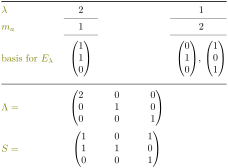

In [133]:
S,Λ,Sinv,A=gen_eigenproblem([1,1,2])
display(latexify([A', latex("= "), S', Λ', Sinv' ]'))
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

L"\begin{equation}
\left[
\begin{array}{cccccc}
A = \frac{1}{12769} & \left[
\begin{array}{ccc}
225 & 0 & -1680 \\
0 & 12769 & 0 \\
-1680 & 0 & 12544 \\
\end{array}
\right] &  S = \frac{1}{113}  & \left[
\begin{array}{ccc}
0 & 15 & 112 \\
113 & 0 & 0 \\
0 & -112 & 15 \\
\end{array}
\right] &  Λ =  & \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

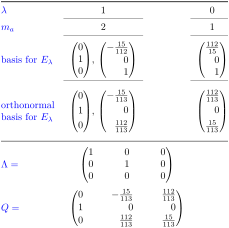

In [134]:
S,Λ,A=gen_symmetric_eigenproblem([1,1,0], maxint=2)
d,A_=factor_out_denominator(A)
dS,S_=factor_out_denominator(S)
display(latexify([latex("A = \\frac{1}{$(d)}"), A_',latex(" S = \\frac{1}{$(dS)} "), S_',latex(" Λ = "), Λ']'))

nM.show_eig_tbl(A_,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp")

L"\begin{equation}
\left[
\begin{array}{cccc}
A =  & \left[
\begin{array}{ccc}
-8 & -3 & -1 \\
-4 & 0 & 0 \\
112 & 36 & 12 \\
\end{array}
\right] &  rref(A-2I) =  & \left[
\begin{array}{ccc}
1 & 0 & \frac{1}{4} \\
0 & 1 & \frac{-1}{2} \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

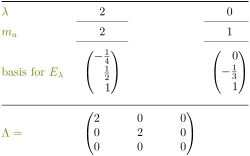

In [135]:
A=Rational{Int64}.(gen_non_diagonalizable_eigenproblem(2,0))
display(latexify([ latex("A = "), A', latex(" rref(A-2I) = "), rref(A-2I)']' ))
nM.show_eig_tbl(Int.(A),fig_scale=1.2, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccc}\nA = \\frac{1}{49}  & \\left[\n\\begin{array}{ccccc}\n-12 & 28 & 18 & 0 & -36 \\\\\n-8 & 84 & 12 & 0 & -24 \\\\\n-24 & -42 & 36 & 0 & -72 \\\\\n\\end{array}\n\\right] &  = \\frac{1}{7} & \\left[\n\\begin{array}{ccc}\n-2 & 3 & 6 \\\\\n-6 & 2 & -3 \\\\\n3" ⋯ 88 bytes ⋯ "2 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] &  \\frac{1}{7} & \\left[\n\\begin{array}{ccccc}\n0 & -7 & 0 & 0 & 0 \\\\\n-2 & 0 & 3 & 0 & -6 \\\\\n3 & 0 & 6 & 0 & 2 \\\\\n0 & 0 & 0 & 7 & 0 \\\\\n6 & 0 & -2 & 0 & -3 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

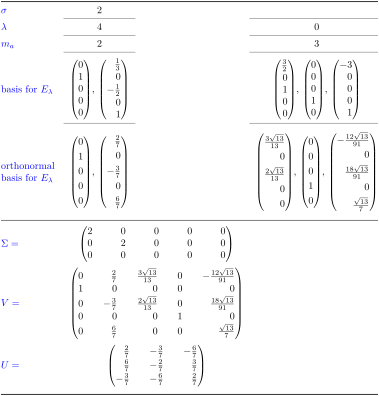

In [136]:
U,Σ,Vt,A = gen_svd_problem(3,[3,2],  [2,2],  maxint=2)
dA,intA=factor_out_denominator(A)
dU,intU=factor_out_denominator(U)
dVt,intVt=factor_out_denominator(Vt)

display( latexify([latex("A = \\frac{1}{$(dA)} "),intA',latex(" = \\frac{1}{$(dU)}"),intU',Σ',latex(" \\frac{1}{$(dVt)}"), intVt']'))

nM.show_svd_table(intA, Ascale=dA, mmS=7, mmLambda=10, tmp_dir="../../tmp")

# 5. WORK

### GE/GJ

In [8]:
#Random.seed!(224);
M=3; N=5; r=2
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=M,has_zeros=false)

pb = ShowGe{Rational{Int}}( A,  Matrix(1I(M)), tmp_dir="../../tmp")

#show_system( pb, b_col=2 )
l_show(L"A =", A)

L"\[A = \begin{pmatrix}
-1 & 1 & -2 & -1 & 1 \\
-2 & 3 & -5 & -1 & 1 \\
-2 & 1 & -3 & -3 & 3
\end{pmatrix}\]
"

No GUI available, some actions may fail

** (inkscape:97383): WARNING **: 00:24:23.176: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


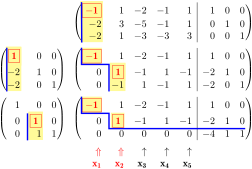

In [9]:
ref!(pb)
show_layout!(pb)

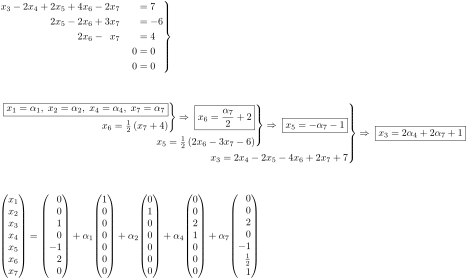

In [32]:
show_backsubstitution!(pb, b_col=1)

In [ ]:
show_solution!(pb, b_col=1)

In [35]:
# we can compute solution matrices rather than a layout
Xp, Xh = solutions(pb)
l_show( L"x_p =", Xp, L"\quad  x_h =", Xh)

L"$x_p =$$\begin{equation}
\left(
\begin{array}{rr}
0 & 0 \\
0 & 0 \\
1 & -1 \\
0 & 0 \\
-1 & 2 \\
2 & -2 \\
0 & 0 \\
\end{array}
\right)
\end{equation}
$$\quad  x_h =$$\begin{equation}
\left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 2 & 2 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
0 & 0 & 0 & \frac{1}{2} \\
0 & 0 & 0 & 1 \\
\end{array}
\right)
\end{equation}
$"

In [37]:
println(l_show(B[:,1]))
println(l_show(B[:,2]))

$\begin{equation}
\left(
\begin{array}{r}
7 \\
-20 \\
18 \\
-22 \\
20 \\
\end{array}
\right)
\end{equation}
$
$\begin{equation}
\left(
\begin{array}{r}
-5 \\
18 \\
-14 \\
18 \\
-18 \\
\end{array}
\right)
\end{equation}
$


In [70]:
if true
    M=6;N=6;r=3
    A=[0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  1   1
       0  0   0   0  1   2
      -3  3  -9  -6  8  -7]
    A    = Rational{Int}.([A I])
    Nrhs = M
elseif false
    M=3; N=6; r=3
    A=[2 -1 -2  1  0 -2;
       4 -2 -4  2 -2 -3;
      -4  2  4 -2  0  4]
    A    = Rational{Int}.([A I])
    Nrhs = M
else
    M=3; N=6; r=3
    A=[0I(M) zeros(Int,M,N-M)]; A[2,3]=2
    A    = Rational{Int}.([A I])
    Nrhs = M
end

matrices, pivot_cols, desc= reduce_to_ref( A; n=N, gj=true );
pivot_list, bg_for_entries, ref_path_list, variable_summary = decorate_ge(desc, pivot_cols, (M,N));

println("number of layers: $(length(matrices))")
display(latexify((to_latex(matrices[end][end]))))


println( "num_levels = $(length(matrices))")
for k in desc println( k ) end
if false
    println("===================================")
    println("pivot_list")
    for k in pivot_list println(".  $k") end
end
if true
    println("===================================")
    println("bg_list")
    for k in bg_for_entries println(".  $k") end
end
if false
    println("===================================")
    println("ref_path_list")
    for k in ref_path_list println(".  $k") end
end

number of layers: 7


L"\begin{equation}
\left[
\begin{array}{cccccccccccc}
1 & -1 & 3 & 2 & 0 & 0 & 0 & 0 & 0 & \frac{23}{3} & -5 & \frac{-1}{3} \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 2 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & -1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

num_levels = 7
GenLinAlgProblems.RequireRowExchange(0, 1, 6, 1, 1, [1])
GenLinAlgProblems.DoRowExchange(1, 1, 6, 1, 1)
GenLinAlgProblems.FoundPivot(1, 1, 6, 1, 1, [1])
GenLinAlgProblems.RequireElimination(1, true, false, 1, 1, 1, [1])
GenLinAlgProblems.RequireRowExchange(1, 2, 4, 5, 2, [1, 5])
GenLinAlgProblems.DoRowExchange(2, 2, 4, 5, 2)
GenLinAlgProblems.FoundPivot(2, 2, 4, 5, 2, [1, 5])
GenLinAlgProblems.RequireElimination(2, true, true, 2, 5, 2, [1, 5])
GenLinAlgProblems.DoElimination(3, 2, 5, true)
GenLinAlgProblems.RequireRowExchange(3, 3, 5, 6, 3, [1, 5, 6])
GenLinAlgProblems.DoRowExchange(4, 3, 5, 6, 3)
GenLinAlgProblems.FoundPivot(4, 3, 5, 6, 3, [1, 5, 6])
GenLinAlgProblems.RequireElimination(4, true, true, 3, 6, 3, [1, 5, 6])
GenLinAlgProblems.DoElimination(5, 3, 6, true)
GenLinAlgProblems.RequireScaling(5, [1, 5, 6])
GenLinAlgProblems.DoScaling(6)
GenLinAlgProblems.Finished(6, [1, 5, 6])
bg_list
.  Any[3, 1, [(0, 0), (1, 4), (2, 5)], "yellow!15"]
.  Any[4, 0, [(2, 4), (4, 2

void Inkscape::UI::Dialog::DialogManager::restore_dialogs_state(Inkscape::UI::Dialog::DialogContainer*, bool): dialogs state not loaded - No such file or directory


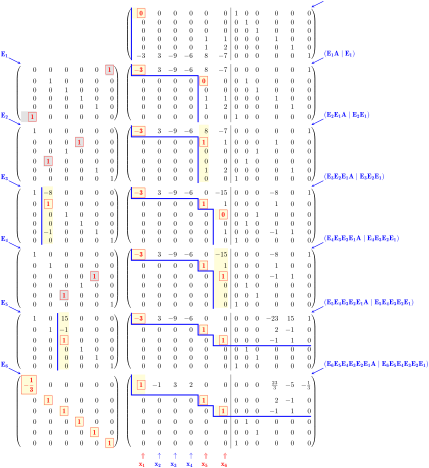

In [71]:
h,m = nM.ge(to_latex(matrices), formater=x->x, Nrhs=Nrhs, tmp_dir="../../tmp",
            pivot_list      = pivot_list,
            ref_path_list   = ref_path_list,
            bg_for_entries  = bg_for_entries,
            array_names     = [ "E", ["A", "I"]],
            variable_summary = variable_summary,
    fig_scale=0.7
)
h

### QR

In [142]:
Random.seed!(232);
A = gen_qr_problem_4(maxint=1)
A = A[:,1:3]
print(latexify(A[:,1:3]))

\begin{equation}
\left[
\begin{array}{ccc}
7 & -4 & -3 \\
-4 & -7 & 15 \\
4 & 0 & 0 \\
0 & 4 & 3 \\
\end{array}
\right]
\end{equation}


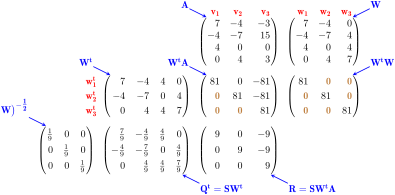

In [143]:
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, fig_scale=1, tmp_dir="../../tmp")
h

In [144]:
#print(latexify(A[:,1:3]))
B = Rational{Int}.(A)
Q = W//9
R = W'B//9

3×3 Matrix{Rational{Int64}}:
 9//1  0//1  -9//1
 0//1  9//1  -9//1
 0//1  0//1   9//1

In [145]:
tr(Q*Q')

3//1

### Eigenproblems

#### General Case

In [49]:
S,Λ,Sinv,A = gen_eigenproblem([-2,-2,0])
d,intA     = factor_out_denominator(A)

if d == 1
    l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )
else
    l_show( L"A = ", 1//d, intA, L"\quad p(\lambda) = %$(charpoly(A))" )
end

L"$A = $$\begin{equation}
\left(
\begin{array}{rrr}
-14 & -12 & 4 \\
0 & -2 & 0 \\
-42 & -42 & 12 \\
\end{array}
\right)
\end{equation}
$$\quad p(\lambda) = -λ^3 - 4*λ^2 - 4*λ$"

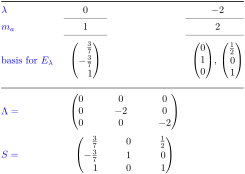

In [139]:
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Complex Case

In [147]:
S,Λ,S_inv, A = gen_cx_eigenproblem( [-1+2im])
d,intA       = factor_out_denominator(A)

if d == 1
    display(latexify( [latex("A = "), A', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
else
    display(latexify([latex("A = "), 1//d, intA', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
end

L"\begin{equation}
\left[
\begin{array}{ccc}
A =  & \left[
\begin{array}{cc}
1 & -2 \\
4 & -3 \\
\end{array}
\right] & \quad p(\lambda) = λ^2 + 2*λ + 5 \\
\end{array}
\right]
\end{equation}
"

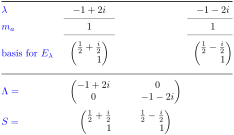

In [148]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Symmetric Case

In [152]:
Random.seed!(243);
S,Λ,A   = gen_symmetric_eigenproblem([1,-1,-1], maxint=2)
d,intA  = factor_out_denominator(A)

if d == 1
    display(latexify( [latex("A = "), A', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
else
    display(latexify([latex("A = "), 1//d, intA', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
end

L"\begin{equation}
\left[
\begin{array}{cccc}
A =  & \frac{1}{289} & \left[
\begin{array}{ccc}
-161 & 240 & 0 \\
240 & 161 & 0 \\
0 & 0 & -289 \\
\end{array}
\right] & \quad p(\lambda) = -λ^3 - λ^2 + λ + 1 \\
\end{array}
\right]
\end{equation}
"

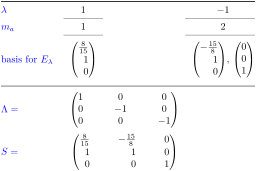

In [154]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Non-diagonalizable Matrix

In [155]:
A       = gen_non_diagonalizable_eigenproblem(2,0)
d,intA  = factor_out_denominator(A)

if d == 1
    display(latexify( [latex("A = "), A', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
else
    display(latexify([latex("A = "), 1//d, intA', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
end

L"\begin{equation}
\left[
\begin{array}{ccc}
A =  & \left[
\begin{array}{ccc}
-55 & -14 & 5 \\
195 & 50 & -17 \\
-75 & -18 & 9 \\
\end{array}
\right] & \quad p(\lambda) = -λ^3 + 4*λ^2 - 4*λ \\
\end{array}
\right]
\end{equation}
"

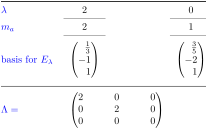

In [157]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Orthonormal Decomposition

In [163]:
Random.seed!(2883);
S,Λ,A   = gen_symmetric_eigenproblem([1,-1,-1], maxint=2)
d,intA  = factor_out_denominator(A)

if d == 1
    display(latexify( [latex("A = "), A', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
else
    display(latexify([latex("A = "), 1//d, intA', latex("\\quad p(\\lambda) = $(charpoly(A))" )]' ))
end

L"\begin{equation}
\left[
\begin{array}{cccc}
A =  & \frac{1}{7225} & \left[
\begin{array}{ccc}
6887 & 2184 & 0 \\
2184 & -6887 & 0 \\
0 & 0 & -7225 \\
\end{array}
\right] & \quad p(\lambda) = -λ^3 - λ^2 + λ + 1 \\
\end{array}
\right]
\end{equation}
"

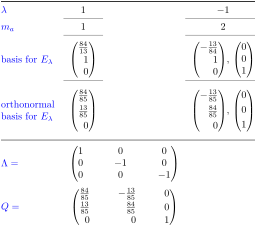

In [165]:
nM.show_eig_tbl(intA,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### SVD

In [161]:
Random.seed!(273);
U,Σ,Vt,A = gen_svd_problem(3,[3,2],  [2,2],  maxint=2)
dA,intA=factor_out_denominator(A)
dU,intU=factor_out_denominator(U)
dVt,intVt=factor_out_denominator(Vt)

display( latexify([latex("A = \\frac{1}{$(dA)} "),intA',latex(" = \\frac{1}{$(dU)}"),intU',Σ',latex(" \\frac{1}{$(dVt)}"), intVt']'))

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccc}\nA = \\frac{1}{35}  & \\left[\n\\begin{array}{ccccc}\n12 & 0 & 18 & -36 & 0 \\\\\n0 & 42 & 0 & 0 & -56 \\\\\n16 & 0 & 24 & -48 & 0 \\\\\n\\end{array}\n\\right] &  = \\frac{1}{5} & \\left[\n\\begin{array}{ccc}\n3 & 0 & -4 \\\\\n0 & 5 & 0 \\\\\n4 & 0 & 3 " ⋯ 94 bytes ⋯ "\n0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] &  \\frac{1}{35} & \\left[\n\\begin{array}{ccccc}\n10 & 0 & 15 & -30 & 0 \\\\\n0 & 21 & 0 & 0 & -28 \\\\\n0 & 28 & 0 & 0 & 21 \\\\\n15 & 0 & -30 & -10 & 0 \\\\\n-30 & 0 & -10 & -15 & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

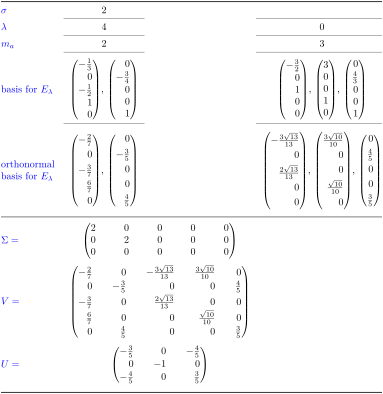

In [162]:
nM.show_svd_table(intA, Ascale=dA, mmS=7, mmLambda=10, tmp_dir="../../tmp")